References

- [FLAN-T5 base on HuggingFace](https://huggingface.co/google/flan-t5-base)
- [Fine-tune FLAN-T5 Notebook](https://github.com/philschmid/deep-learning-pytorch-huggingface/blob/main/training/flan-t5-samsum-summarization.ipynb)
- [Fine-tune FLAN-T5 Tutorial](https://youtu.be/PZE_08Lshr4)
- [MuP dataset on HuggingFace](https://huggingface.co/datasets/allenai/mup)

## Dependencies

In [ ]:
!pip install transformers datasets evaluate rouge_score nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 

## Config

In [ ]:
import torch
dataset_id = 'allenai/mup'
model_id = 'google/flan-t5-base'
max_source_length = 2048
max_target_length = 512
batch_size = 8
device = device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Running FLAN-T5 base following the instructions on HuggingFace

In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")

In [ ]:
input_text_list = []
input_text = "translate English to German: How old are you?"
input_text_list.append(input_text)
input_text = "summerize: The paper considers a particular setting of distributed mean estimation problem, where each party has a vector of potentially large $l_2$ norm, yet this vectors are fairly close to each other. The goal is to communicate as few bits as possible and estimate the mean of the vectors. Previous approaches had the dependence on the size of the ball containing all the vectors, which gives bad bounds if vectors are long (but close to each other)."
input_text_list.append(input_text)
input_ids = tokenizer(input_text_list, max_length=2048, padding='max_length', truncation=True, return_tensors="pt").input_ids

In [ ]:
input_ids.shape

torch.Size([2, 2048])

In [ ]:
outputs = model.generate(input_ids, max_new_tokens=512)

In [ ]:
print(tokenizer.decode(outputs[0], skip_special_tokens=True))
print(tokenizer.batch_decode(outputs, skip_special_tokens=True))

Wie old sind Sie?
['Wie old sind Sie?', 'A distributed mean estimation problem with a vector of potentially large norms.']


## Dataset exploration

In [ ]:
from datasets import load_dataset

dataset = load_dataset(dataset_id)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/allenai___csv/allenai--mup-c30ba3347ec8183d/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
dataset.keys()

dict_keys(['train', 'validation'])

In [ ]:
print(f'Train dataset size: {len(dataset["train"])}')
print(f'Validation dataset size: {len(dataset["validation"])}')

Train dataset size: 18934
Validation dataset size: 3604


In [ ]:
# Check an example of the dataset
from random import randrange

sample = dataset['train'][randrange(len(dataset['train']))]

for key in sample.keys():
  print(f'{key}:\n')
  print(sample[key])
  print('\n-----------------')

paper_name:

Iterative Deep Graph Learning for Graph Neural Networks

-----------------
text:

1 INTRODUCTION . Recent years have seen a significantly growing amount of interest in graph neural networks ( GNNs ) , especially on efforts devoted to developing more effective GNNs for node classification ( Li et al. , 2016 ; Kipf & Welling , 2016 ; Hamilton et al. , 2017a ) , graph classification ( Ying et al. , 2018b ; Ma et al. , 2019 ) , and graph generation ( Samanta et al. , 2018 ; Li et al. , 2018b ; You et al. , 2018 ) . Encouraged by their huge success , GNNs have widely been used in a variety of domain specific applications such as machine reading comprehension ( Chen et al. , 2019a ) , semantic parsing ( Xu et al. , 2018b ) , natural language generation ( Chen et al. , 2019b ) , and healthcare informatics ( Gao et al. , 2019 ) . Despite GNNs ’ powerful ability of learning expressive node embeddings , unfortunately , GNNs can only be used when graph-structured data is available . 

Understand the length of the data

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_id)

In [ ]:
from datasets import concatenate_datasets

# The maximum total input sequence length after tokenization.
# Sequences longer than this will be truncated, sequences shorter will be padded.
tokenized_inputs = concatenate_datasets([dataset["train"], dataset["validation"]]).map(lambda x: tokenizer(x["text"], truncation=False), batched=True, remove_columns=['paper_name', 'text', 'summary', 'paper_id'])
max_source_length = max([len(x) for x in tokenized_inputs["input_ids"]])
print(f"Max source length: {max_source_length}")

# The maximum total sequence length for target text after tokenization.
# Sequences longer than this will be truncated, sequences shorter will be padded."
tokenized_targets = concatenate_datasets([dataset["train"], dataset["validation"]]).map(lambda x: tokenizer(x["summary"], truncation=False), batched=True, remove_columns=['paper_name', 'text', 'summary', 'paper_id'])
max_target_length = max([len(x) for x in tokenized_targets["input_ids"]])
print(f"Max target length: {max_target_length}")

Map:   0%|          | 0/22538 [00:00<?, ? examples/s]

Max source length: 136690


Map:   0%|          | 0/22538 [00:00<?, ? examples/s]

Max target length: 1397


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# statistics of the average, min, max, and median length of the input sequences
source_length_list = np.array([len(x) for x in tokenized_inputs['input_ids']])
target_length_list = np.array([len(x) for x in tokenized_targets['input_ids']])

In [ ]:
def statistics(length_list):
  print(f"Average length: {np.mean(length_list)}")
  print(f"Min length: {np.min(length_list)}")
  print(f"Max length: {np.max(length_list)}")
  print(f"Median length: {np.median(length_list)}")
  # 99 percentile of the input sequence length
  print(f"99 percentile length: {np.percentile(length_list, 99)}")
  # 95 percentile of the input sequence length
  print(f"95 percentile length: {np.percentile(length_list, 95)}")
  # 90 percentile of the input sequence length
  print(f"90 percentile length: {np.percentile(length_list, 90)}")
  # box plot of the input sequence length
  plt.boxplot(length_list, showfliers=True)
  # Show average length
  plt.axhline(y=np.mean(length_list), color='r', linestyle='-')
  plt.show()

Source
Average length: 4109.105466323543
Min length: 2686
Max length: 136690
Median length: 3530.0
99 percentile length: 14467.0
95 percentile length: 5634.149999999998
90 percentile length: 4802.0


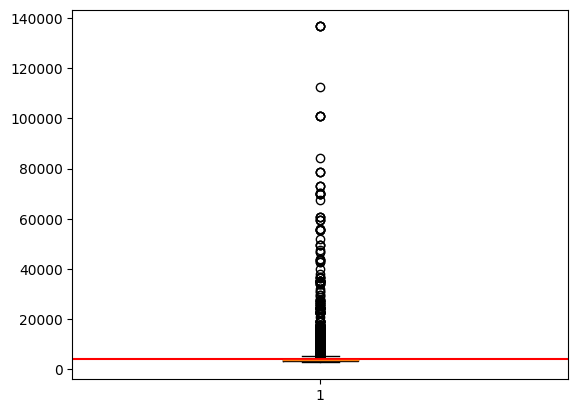

In [ ]:
print('Source')
statistics(source_length_list)

Target
Average length: 147.87478924483096
Min length: 31
Max length: 1397
Median length: 126.0
99 percentile length: 477.0
95 percentile length: 293.0
90 percentile length: 234.0


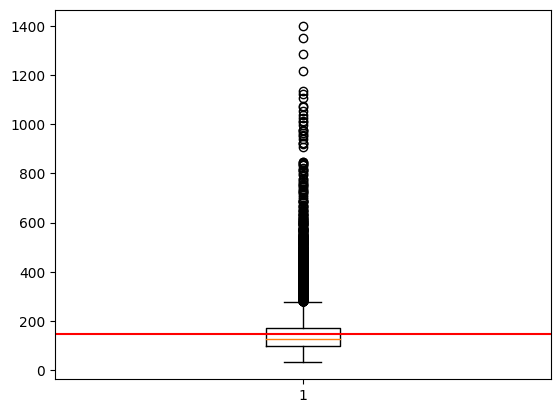

In [ ]:
print('Target')
statistics(target_length_list)

## Experimentation with the ROUGE metric

In [ ]:
import evaluate

rouge = evaluate.load('rouge')

In [ ]:
predictions = ['hello there', 'hello', 'hello there']
references = [['hello you', 'hello there'], ['hello you', 'hello there'], ['hello', 'hi']]
results = rouge.compute(predictions=predictions, references=references, use_aggregator=False)
aggregated_results = rouge.compute(predictions=predictions, references=references, use_aggregator=True)
print(results, aggregated_results, sep='\n')

{'rouge1': [1.0, 0.6666666666666666, 0.6666666666666666], 'rouge2': [1.0, 0.0, 0.0], 'rougeL': [1.0, 0.6666666666666666, 0.6666666666666666], 'rougeLsum': [1.0, 0.6666666666666666, 0.6666666666666666]}
{'rouge1': 0.7777777777777777, 'rouge2': 0.3333333333333333, 'rougeL': 0.7777777777777777, 'rougeLsum': 0.7777777777777777}


## Evaluation

preprocess dataset

In [ ]:
# load dataset and tokenizer
from datasets import load_dataset
from transformers import AutoTokenizer

dataset = load_dataset(dataset_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/allenai___csv/allenai--mup-c30ba3347ec8183d/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
inputs = []
val_paper_name = dataset['validation']['paper_name']
val_text = dataset['validation']['text']
val_summary = dataset['validation']['summary']
val_paper_id = dataset['validation']['paper_id']
assert len(val_paper_name) == len(val_text) == len(val_summary) == len(val_paper_id)

In [ ]:
len(val_paper_name)

3604

In [ ]:
# Merge the same paper
inputs: list[str] = []
references: list[list[str]] = []
paper_ids: list[str] = []

for i in range(len(val_paper_name)):
    if i == 0 or val_paper_name[i] != val_paper_name[i-1]:
        inputs.append(f'summarize: {val_paper_name[i]} {val_text[i]}')
        references.append([val_summary[i]])
        paper_ids.append(val_paper_id[i])
    else:
        references[-1].append(val_summary[i])

In [ ]:
print(inputs[0])
print()
for i in references[0]:
  print(i)

summarize: Practical Locally Private Federated Learning with Communication Efficiency 1 INTRODUCTION . 1.1 BACKGROUND . Federated learning ( FL ) Kairouz et al . ( 2019 ) ; Konečnỳ et al . ( 2016 ) is a rapidly evolving application of distributed optimization to large-scale learning or estimation scenarios where multiple entities . called clients , collaborate in solving a machine learning problem , under the coordination of a central server . Each client ’ s raw data is stored locally and not exchanged or transferred . To achieve the learning objective , the server collects minimal information from the clients for immediate aggregation . FL is particularly suitable for mobile and edge device applications since the ( sensitive ) individual data never directly leave the device and has seen deployments in industries ( ? Hard et al. , 2019 ; Leroy et al. , 2019 ) . While FL offers significant practical privacy improvements over centralizing all the training data , it lacks a formal priv

In [ ]:
# Save/load results to Google Drive
import os
import pickle
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/TrialTask

Mounted at /content/drive
/content/drive/My Drive/TrialTask


In [ ]:
from transformers import AutoModelForSeq2SeqLM

local_model = './Checkpoints/checkpoint-28401'

if local_model is None:
  # load model from the hub
  model = AutoModelForSeq2SeqLM.from_pretrained(model_id).to(device)
else:
  # load model from local
  # Requires config.json and pytorch_model.bin
  model = AutoModelForSeq2SeqLM.from_pretrained(local_model).to(device)

In [ ]:
from tqdm import tqdm
predictions = []

for i in tqdm(range(0, len(inputs), batch_size)):
    batch = inputs[i:i+batch_size]
    input_ids = tokenizer(batch, max_length=max_source_length, padding='max_length', truncation=True, return_tensors="pt").input_ids.to(device)
    outputs = model.generate(input_ids, max_new_tokens=max_target_length)
    predictions.extend(tokenizer.batch_decode(outputs, skip_special_tokens=True))

100%|██████████| 133/133 [25:16<00:00, 11.41s/it]


In [ ]:
predictions[0]

'This paper proposes a local differential privacy (LDP) algorithm for federated learning. The authors propose a local differential privacy algorithm that is based on a randomized algorithm that obfuscates the data before leaving the client. The authors show that the proposed algorithm can be applied to both cross-silo and cross-device FL.'

In [ ]:
references[0]

['This paper studies FL under local differential privacy constraints. They identify two major concerns in designing practical privacy-preserving FL algorithms: communication efficiency and high\x02dimensional compatibility, and develop a gradient-based learning algorithm sqSGD that addresses both concerns. They improve the base algorithm in two ways: First, apply a gradient subsampling strategy that offers simultaneously better training performance and smaller communication costs. Secondly, utilize randomized rotation as a preprocessing step to reduce quantization error. ',
 'This paper studies a low communication algorithm for multivariate mean estimation in the federated learning setting with differentially private communication. The algorithm uses quantization and dimension subsampling (only reporting some coordinates of the vector) to lower communication and randomized rotation (essentially applying a random orthogonal matrix) to reduce quantization error. They then apply this algo

In [ ]:
paper_ids[0]

'SP:7f4b788b00a2a10bcd60351c3e04c8f597101e96'

In [ ]:
len(paper_ids)

1060

In [ ]:
# Save
assert os.path.exists('predictions.pkl') == False
with open('predictions.pkl', 'wb') as f:
    pickle.dump(predictions, f)

# with open('references.pkl', 'wb') as f:
#     pickle.dump(references, f)

# with open('paper_ids.pkl', 'wb') as f:
#     pickle.dump(paper_ids, f)

In [ ]:
# Load
with open('predictions_base.pkl', 'rb') as f:
    predictions = pickle.load(f)

with open('references.pkl', 'rb') as f:
    references = pickle.load(f)

with open('paper_ids.pkl', 'rb') as f:
    paper_ids = pickle.load(f)

Also evaluate the dataset

In [ ]:
print(min([len(x) for x in references]))
print(max([len(x) for x in references]))

2
5


In [ ]:
evaluate_dataset = True

if evaluate_dataset:
  predictions = [x.pop() for x in references]
  print(min([len(x) for x in references]))
  print(max([len(x) for x in references]))

1
4


In [ ]:
# Postprocess
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
predictions = [pred.strip() for pred in predictions]
references = [[ref.strip() for ref in refs] for refs in references]

# rougeLSum expects newline after each sentence
predictions = ["\n".join(sent_tokenize(pred)) for pred in predictions]
references = [["\n".join(sent_tokenize(ref)) for ref in refs] for refs in references]

In [ ]:
references[0]

['This paper studies FL under local differential privacy constraints.\nThey identify two major concerns in designing practical privacy-preserving FL algorithms: communication efficiency and high\x02dimensional compatibility, and develop a gradient-based learning algorithm sqSGD that addresses both concerns.\nThey improve the base algorithm in two ways: First, apply a gradient subsampling strategy that offers simultaneously better training performance and smaller communication costs.\nSecondly, utilize randomized rotation as a preprocessing step to reduce quantization error.',
 'This paper studies a low communication algorithm for multivariate mean estimation in the federated learning setting with differentially private communication.\nThe algorithm uses quantization and dimension subsampling (only reporting some coordinates of the vector) to lower communication and randomized rotation (essentially applying a random orthogonal matrix) to reduce quantization error.\nThey then apply this 

Calculate ROUGE

In [ ]:
import evaluate

rouge = evaluate.load('rouge')

In [ ]:
results = rouge.compute(predictions=predictions, references=references, use_aggregator=False)
aggregated_results = rouge.compute(predictions=predictions, references=references, use_aggregator=True)

{'rouge1': 0.3566044916493251, 'rouge2': 0.0899017806714395, 'rougeL': 0.21310881836769546, 'rougeLsum': 0.31844756699989774}


In [ ]:
# Save results to Google Drive
assert os.path.exists('results.pkl') == False
with open('results.pkl', 'wb') as f:
    pickle.dump(results, f)

assert os.path.exists('aggregated_results.pkl') == False
with open('aggregated_results.pkl', 'wb') as f:
    pickle.dump(aggregated_results, f)

In [ ]:
# Load
with open('results_base.pkl', 'rb') as f:
    results = pickle.load(f)

with open('aggregated_results_human.pkl', 'rb') as f:
    aggregated_results = pickle.load(f)

In [ ]:
print(aggregated_results)

{'rouge1': 0.3566044916493251, 'rouge2': 0.0899017806714395, 'rougeL': 0.21310881836769546, 'rougeLsum': 0.31844756699989774}


Qualitative analysis

In [ ]:
# Sort predictions, references, paper_ids by ROUGE-1
rouge1: list[float] = results['rouge1']
sorted_rouge1, sorted_predictions, sorted_references, sorted_paper_ids = zip(*sorted(zip(rouge1, predictions, references, paper_ids), reverse=True))

In [ ]:
# # Print top n predictions and bottom n predictions
# n = 10

# for i in range(n):
#     paper_id = sorted_paper_ids[i]
#     r1 = sorted_rouge1[i]
#     pred = sorted_predictions[i]
#     ref = sorted_references[i]
#     # Find the ref with the highest ROUGE-1
#     r1_ref = rouge.compute(predictions=[pred for _ in range(len(ref))],
#                            references=[r for r in ref],
#                            use_aggregator=False)['rouge1']
#     max_r1_ref = max(r1_ref)
#     assert r1 == max_r1_ref
#     max_r1_ref_idx = r1_ref.index(max_r1_ref)
#     print(paper_id)
#     print(r1)
#     print(' '.join(pred.split('\n')))
#     print(' '.join(ref[max_r1_ref_idx].split('\n')))
#     print()

# for i in range(1, n+1):
#     paper_id = sorted_paper_ids[-i]
#     r1 = sorted_rouge1[-i]
#     pred = sorted_predictions[-i]
#     ref = sorted_references[-i]
#     # Find the ref with the highest ROUGE-1
#     r1_ref = rouge.compute(predictions=[pred for _ in range(len(ref))],
#                            references=[r for r in ref],
#                            use_aggregator=False)['rouge1']
#     max_r1_ref = max(r1_ref)
#     assert r1 == max_r1_ref
#     max_r1_ref_idx = r1_ref.index(max_r1_ref)
#     print(paper_id)
#     print(r1)
#     print(' '.join(pred.split('\n')))
#     print(' '.join(ref[max_r1_ref_idx].split('\n')))
#     print()

for i in range(465, 475):
    paper_id = sorted_paper_ids[i]
    r1 = sorted_rouge1[i]
    pred = sorted_predictions[i]
    ref = sorted_references[i]
    # Find the ref with the highest ROUGE-1
    r1_ref = rouge.compute(predictions=[pred for _ in range(len(ref))],
                           references=[r for r in ref],
                           use_aggregator=False)['rouge1']
    max_r1_ref = max(r1_ref)
    assert r1 == max_r1_ref
    max_r1_ref_idx = r1_ref.index(max_r1_ref)
    print(paper_id)
    print(r1)
    print(' '.join(pred.split('\n')))
    print(' '.join(ref[max_r1_ref_idx].split('\n')))
    print()

SP:4d7c1e30fa8eb3e7c67a4ec3bccc5d3ef713a773
0.39603960396039606
This paper proposes a new method for maximum common subgraph detection. The method is based on a deep Q-Network (DQN) that learns to search. The method is evaluated on synthetic and real-world graphs.
The paper deals with the problem of Maximum Common Subgraph (MCS) detection, following a learning-based approach. In particular, it introduces GLSEARCH, a model that leverages representations learned by GNNs in a reinforcement learning framework to allow for efficient search. The proposed model has been experimentally evaluated on both artificial and real-world graphs, and its performance has been compared against traditional and learning-based baselines.

SP:eb54e84275266d8909fcbfe1589da1c4396c3164
0.39603960396039606
This paper proposes a new method for learning object representations in a temporal manner. The method is based on the MoCo contrastive learning framework. The method is evaluated on three datasets, and the resu

Plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# Config
results_paths = ['results_base.pkl', 'results_toy.pkl', 'results_1.pkl', 'results_2.pkl', 'results_3.pkl', 'results_human.pkl']
result_types = ['rouge1', 'rouge2', 'rougeL']
x_tick_labels = ['Base', 'Toy', 'Epoch 1', 'Epoch 2', 'Epoch 3', 'Human']
x_labels = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']

# Read results
results_list = []
for results_path in results_paths:
  with open(results_path, 'rb') as f:
      results = pickle.load(f)
      results_list.append(results)

# Process results
to_plot: list[list[list]] = []
# for results in results_list:
#   to_plot.append([results[type] for type in result_types])
for result_type in result_types:
  to_plot.append([results[result_type] for results in results_list])

assert len(to_plot) == len(x_labels)

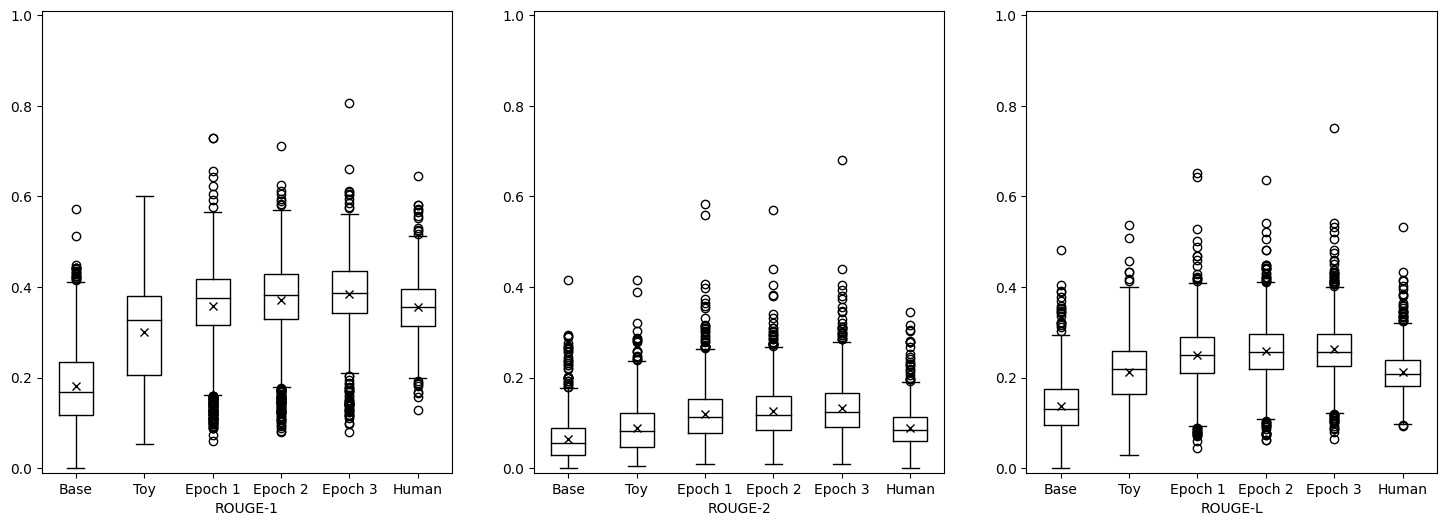

In [ ]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, len(x_labels), figsize=(6 * len(x_labels), 2 * len(x_labels)))
meanprops = dict(marker='x', markeredgecolor='black')
medianprops = dict(color='black')

# Plot the plots
for i in range(len(x_labels)):
  axs[i].boxplot(to_plot[i], showmeans=True, meanprops=meanprops, medianprops=medianprops, showfliers=True)
  axs[i].set_xlabel(x_labels[i])

for ax in axs:
  ax.set_xticklabels(x_tick_labels)
  ax.set_ylim(-0.01, 1.01)

# Show the plot
plt.show()